In [4]:
def infer_duration_in_seconds(duration_description):
    text = str(duration_description).lower()
    #"1s 2+ secs 3h 3 hours about 4 mins"
    
    for metric, secs in zip(["second", "s","segundo","minute","m","min","hour",  "h"],
                           [       1,   1,        1,      60, 60,   60,  3600, 3600]):
        regex = "\s*(\d+)\+?\s*{}s?".format(metric)
        # this regular expression will find the following bit of text
        # space followed by a number (\d) followed optionally by a + and then optionally by a space
        # and then the metric (with optional s at the end for plural)
        # this covers a lot of cases
        # 34m
        # 3+ hs
        # three minutes
        # 5-10 minute -> 10 minutes -> 7.5
        res = re.findall(regex,text)
        if len(res)>0:
            return int(float(res[0]) * secs)
    return None

In [7]:
from matplotlib import pyplot as plt
# seaborn - uses matplotlib internally - seaborn also is designed to work with pandas dataframes very easily
# bokeh - javascript and python - afaik it has its own engine

import pandas as pd
import numpy as np

df = pd.read_csv("processed.csv", parse_dates=["start_dt","end_dt"])
df = df[df.columns[1:]]
df.head()

,datestr,city,state,shape,duration_description,start_dt,duration_secs,end_dt,location_name,lon,lat
0,3/16/17 23:30,Ruso,ND,light,30 seconds,2017-03-16 23:30:00,30.0,2017-03-16 23:30:30,ND Ruso,-100.933481,47.838337
1,3/16/17 21:41,Salem,OR,flash,3 seconds,2017-03-16 21:41:00,3.0,2017-03-16 21:41:03,OR Salem,-123.035096,44.942898
2,3/16/17 21:00,Auburn,WA,light,10 minutes,2017-03-16 21:00:00,600.0,2017-03-16 21:10:00,WA Auburn,-122.228453,47.307323
3,3/16/17 20:12,Tempe,AZ,other,50 minutes,2017-03-16 20:12:00,3000.0,2017-03-16 21:02:00,AZ Tempe,-111.940005,33.425510
4,3/16/17 19:35,Chandler,AZ,triangle,1 minute,2017-03-16 19:35:00,60.0,2017-03-16 19:36:00,AZ Chandler,-111.841250,33.306160


In [13]:
df["hour_of_day"] = df["start_dt"].apply(lambda x: x.hour)
df.head()

,datestr,city,state,shape,duration_description,start_dt,duration_secs,end_dt,location_name,lon,lat,hour_of_day
0,3/16/17 23:30,Ruso,ND,light,30 seconds,2017-03-16 23:30:00,30.0,2017-03-16 23:30:30,ND Ruso,-100.933481,47.838337,23
1,3/16/17 21:41,Salem,OR,flash,3 seconds,2017-03-16 21:41:00,3.0,2017-03-16 21:41:03,OR Salem,-123.035096,44.942898,21
2,3/16/17 21:00,Auburn,WA,light,10 minutes,2017-03-16 21:00:00,600.0,2017-03-16 21:10:00,WA Auburn,-122.228453,47.307323,21
3,3/16/17 20:12,Tempe,AZ,other,50 minutes,2017-03-16 20:12:00,3000.0,2017-03-16 21:02:00,AZ Tempe,-111.940005,33.425510,20
4,3/16/17 19:35,Chandler,AZ,triangle,1 minute,2017-03-16 19:35:00,60.0,2017-03-16 19:36:00,AZ Chandler,-111.841250,33.306160,19


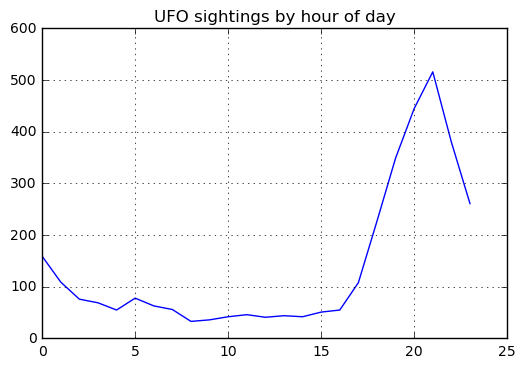

In [21]:
# get the counts by hour of day
counts_by_hour_of_day = df["hour_of_day"].value_counts().sort_index()

plt.plot(counts_by_hour_of_day.index, counts_by_hour_of_day.values)
plt.grid()
plt.title("UFO sightings by hour of day")
plt.show()


In [24]:
df["month"] =  df["start_dt"].apply(lambda x: x.month)

def determine_season(month):
    if month in [12,1,2]:
        return "winter"
    if month in [3,4,5]:
        return "spring"
    if month in [6,7,8]:
        return "summer"
    return "autumn"


In [25]:
df["season"] = df["month"].apply(determine_season)
df.head()

,datestr,city,state,shape,duration_description,start_dt,duration_secs,end_dt,location_name,lon,lat,hour_of_day,month,season
0,3/16/17 23:30,Ruso,ND,light,30 seconds,2017-03-16 23:30:00,30.0,2017-03-16 23:30:30,ND Ruso,-100.933481,47.838337,23,3,spring
1,3/16/17 21:41,Salem,OR,flash,3 seconds,2017-03-16 21:41:00,3.0,2017-03-16 21:41:03,OR Salem,-123.035096,44.942898,21,3,spring
2,3/16/17 21:00,Auburn,WA,light,10 minutes,2017-03-16 21:00:00,600.0,2017-03-16 21:10:00,WA Auburn,-122.228453,47.307323,21,3,spring
3,3/16/17 20:12,Tempe,AZ,other,50 minutes,2017-03-16 20:12:00,3000.0,2017-03-16 21:02:00,AZ Tempe,-111.940005,33.425510,20,3,spring
4,3/16/17 19:35,Chandler,AZ,triangle,1 minute,2017-03-16 19:35:00,60.0,2017-03-16 19:36:00,AZ Chandler,-111.841250,33.306160,19,3,spring


In [30]:
spring = df[df["season"] == "spring"]


boolean_series = df["season"] == "spring"

df[boolean_series] # this keeps only the parts of the dataframe for which the value of the boolean series is True
print len(df)
print len(spring)

#why use a boolean index???
# a boolean index can be a list or a series
# for performance
#df[ [True, False, True] ] 

3341
411


ValueError: Item wrong length 3 instead of 3341.

In [32]:
df2 = pd.DataFrame([10,20,30,40])
df2[[True, False, False, True]]

,0
0,10
3,40


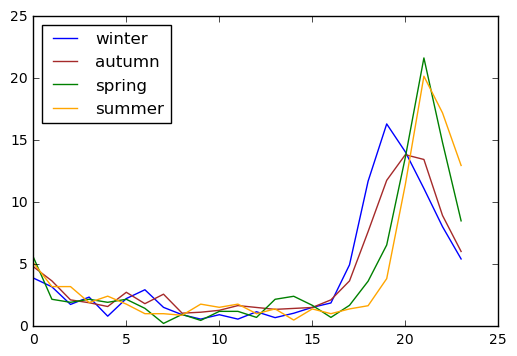

In [42]:
## now, the actual plot 
colors = ["blue", "brown", "green", "orange"]
for color,season in zip(colors, ["winter","autumn","spring","summer"]):
    seasonal_df = df[df["season"] == season]
    counts_by_hour_of_day = seasonal_df["hour_of_day"].value_counts().sort_index()
    pcts_by_hour_of_day = counts_by_hour_of_day * 100.0/ counts_by_hour_of_day.sum()
    
    plt.plot(pcts_by_hour_of_day.index, pcts_by_hour_of_day.values, label=season, color=color)

plt.legend(loc='upper left')
plt.show()
    
    

0      5.141388
1      3.213368
2      3.213368
3      1.928021
4      2.442159
5      1.799486
6      1.028278
7      1.028278
8      0.899743
9      1.799486
10     1.542416
11     1.799486
12     1.028278
13     1.413882
14     0.514139
15     1.413882
16     1.028278
17     1.413882
18     1.670951
19     3.856041
20    11.439589
21    20.179949
22    17.223650
23    12.982005
Name: hour_of_day, dtype: float64

In [43]:
from mpl_toolkits.basemap import Basemap
map = Basemap(projection='mill',lon_0=0)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()
plt.show()

ImportError: No module named basemap